In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, shapiro, kendalltau, spearmanr, ks_2samp
import scipy.stats as stats

In [173]:
df = pd.read_csv('insurance.csv')

In [174]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [175]:
print(f"Total number of rows: {df.shape[0]} \nTotal number of features: {df.shape[1]}")

Total number of rows: 986 
Total number of features: 11


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [177]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [178]:
# No null values  

In [179]:
#Distribution of PremiumPrice

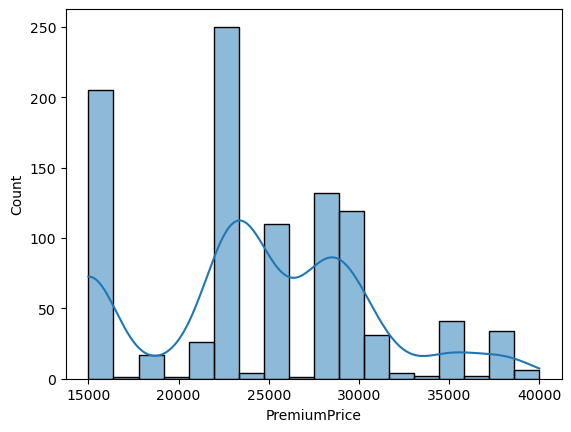

In [180]:
sns.histplot(df['PremiumPrice'], kde = True)
plt.show()

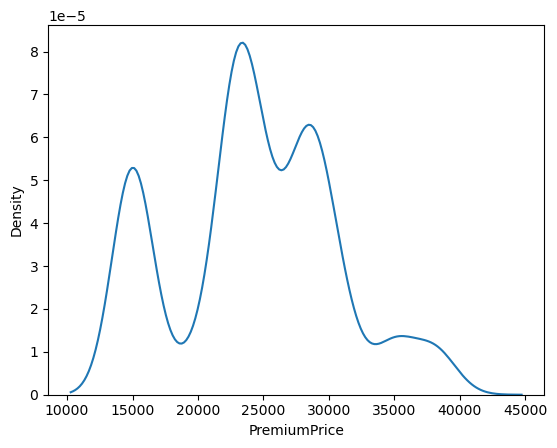

In [181]:
sns.kdeplot(x= df['PremiumPrice'])
plt.show()

In [182]:
#Relation of all features with Premium Price

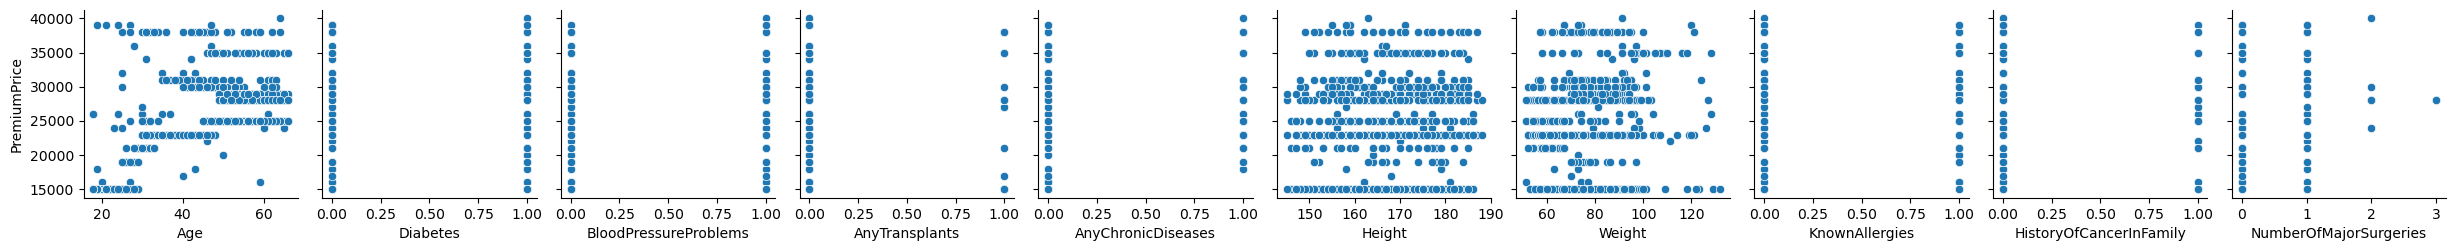

In [183]:
sns.pairplot(df, x_vars=['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'], y_vars=['PremiumPrice'], kind='scatter')
plt.show()

Age, Height, Weight is having relation with Premium Price

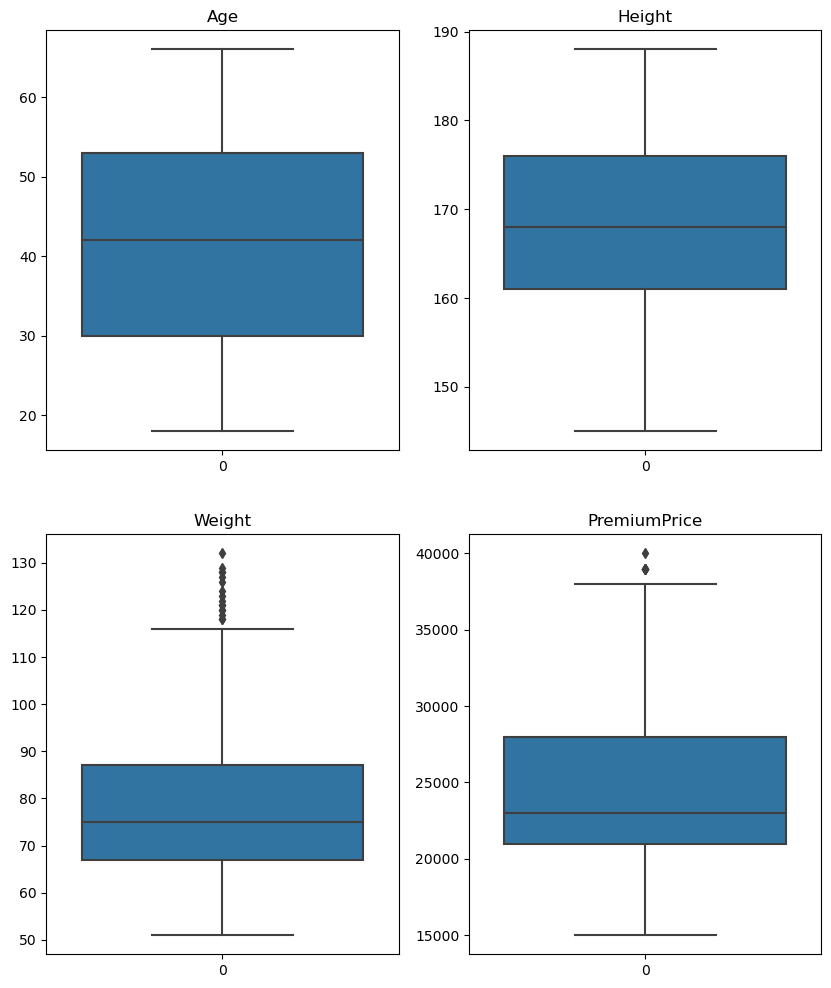

In [184]:
plt.figure(figsize =(10,12))
n = 1
for i in ['Age', 'Height', 'Weight', 'PremiumPrice']:
    plt.subplot(2,2,n)
    plt.title(f"{i}")
    sns.boxplot(df[i])
    n = n+1
plt.show()

In [185]:
#Distribution of all the features

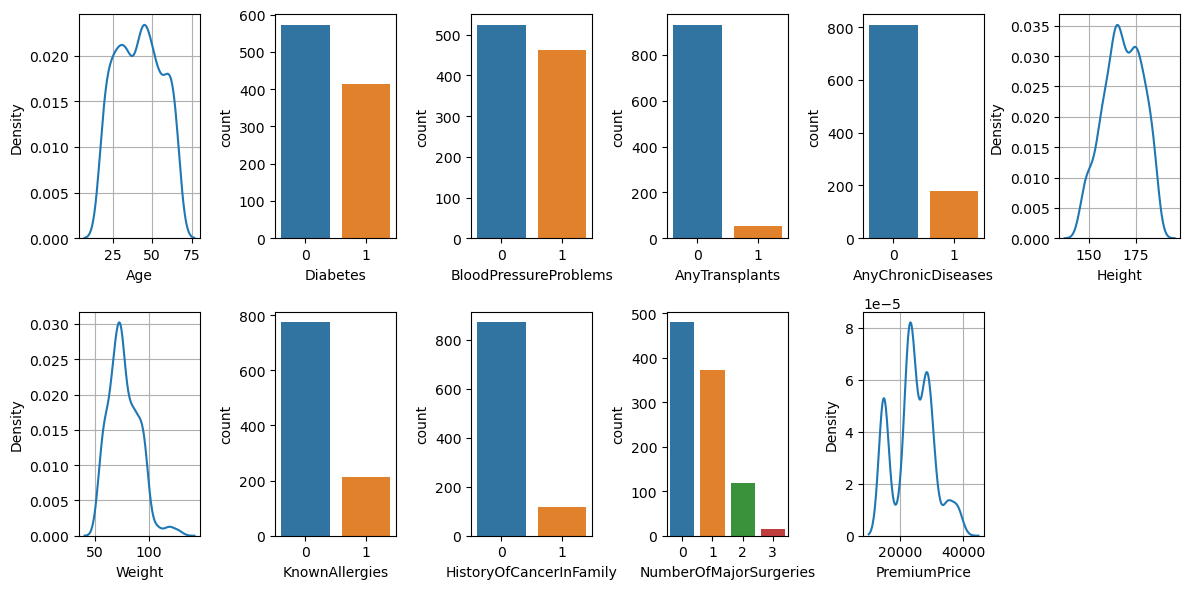

In [186]:
plt.figure(figsize = (12,6))
r=2
c=6
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    if df[i].nunique()<=4:
        sns.countplot(x=df[i])
    else:
        sns.kdeplot(x=df[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'correlation matrix')

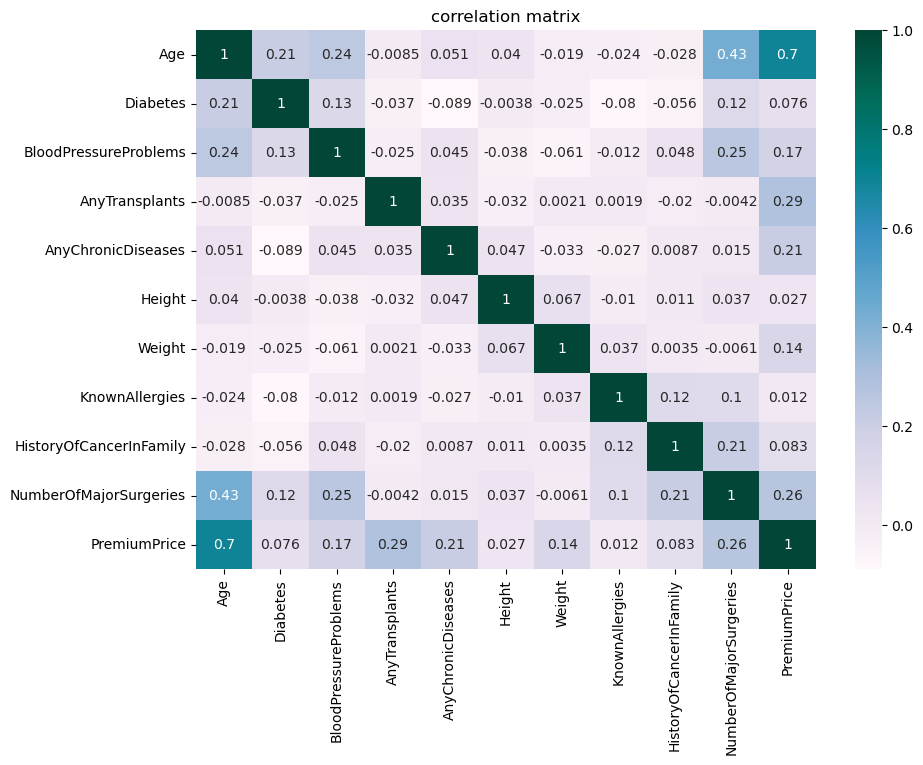

In [187]:
correlation = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, cmap='PuBuGn')
plt.title('correlation matrix')

Age is correlated to the PremiumPrice

Hypothesis testing

Hypothesis 1: There is a significant correlation between 'Age' and 'PremiumPrice' variables.

Null Hypothesis (H0): There is no significant relationship between 'Age' and 'PremiumPrice'.
Alternative Hypothesis (H1): There is a significant relationship between 'Age' and 'PremiumPrice'.

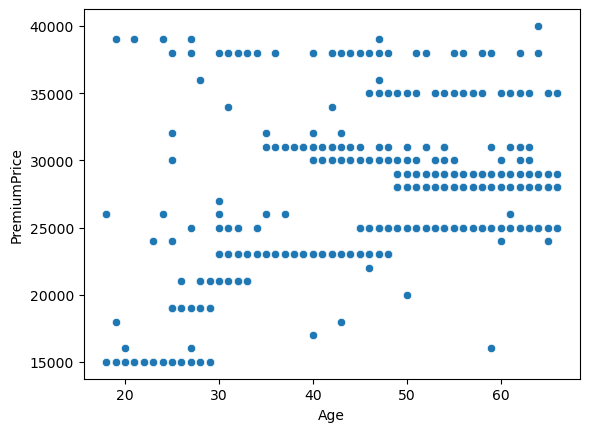

In [188]:
sns.scatterplot(x='Age', y='PremiumPrice', data=df)
plt.show()

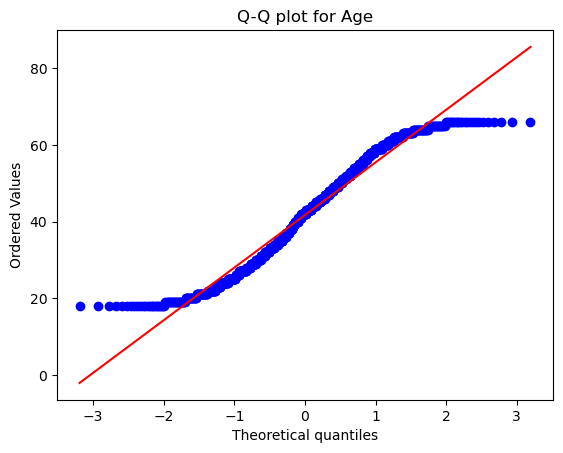

In [189]:
# Q-Q plot for Age
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Q-Q plot for Age')
plt.show()

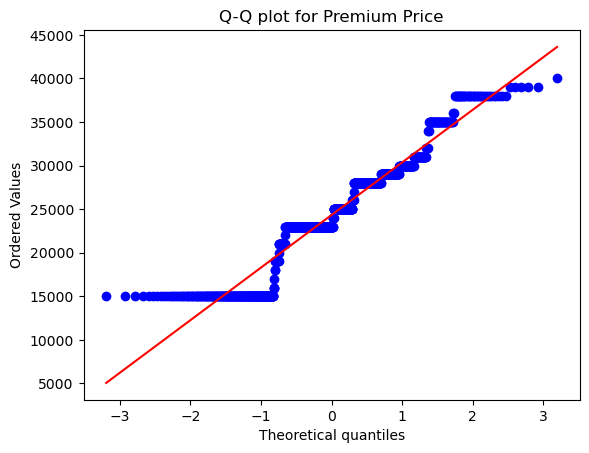

In [190]:
# Q-Q plot for PremiumPrice
stats.probplot(df['PremiumPrice'], dist="norm", plot=plt)
plt.title('Q-Q plot for Premium Price')
plt.show()

In [191]:
shapiro_test_age = shapiro(df['Age'])
shapiro_test_premium = shapiro(df['PremiumPrice'])
print(f"Shapiro-Wilk test for Age: Statistic={shapiro_test_age.statistic}, p-value={shapiro_test_age.pvalue}")
print(f"Shapiro-Wilk test for Premium Price: Statistic={shapiro_test_premium.statistic}, p-value={shapiro_test_premium.pvalue}")

# Interpretation
alpha = 0.05  # Common significance level

if shapiro_test_age.pvalue > alpha:
    print("Fail to reject the null hypothesis for Age. The data is normally distributed.")
else:
    print("Reject the null hypothesis for Age. The data is not normally distributed.")

if shapiro_test_premium.pvalue > alpha:
    print("Fail to reject the null hypothesis for Premium Price. The data is normally distributed.")
else:
    print("Reject the null hypothesis for Premium Price. The data is not normally distributed.")


Shapiro-Wilk test for Age: Statistic=0.9588656425476074, p-value=5.01247046070342e-16
Shapiro-Wilk test for Premium Price: Statistic=0.9272118210792542, p-value=1.8807914164760764e-21
Reject the null hypothesis for Age. The data is not normally distributed.
Reject the null hypothesis for Premium Price. The data is not normally distributed.


In [192]:
# As data is not linear, not normally distributed, will choose Kendall’s Test

In [193]:
# Calculate the Pearson correlation coefficient and p-value
pearson_corr, pearson_p_value = pearsonr(df['Age'], df['PremiumPrice'])
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Pearson p-value: {pearson_p_value}")

# Calculate the Spearman correlation coefficient and p-value
spearman_corr, spearman_p_value = spearmanr(df['Age'], df['PremiumPrice'])
print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"Spearman p-value: {spearman_p_value}")

# Calculate the Kendall correlation coefficient and p-value
kendall_corr, kendall_p_value = kendalltau(df['Age'], df['PremiumPrice'])
print(f"Kendall correlation coefficient: {kendall_corr}")
print(f"Kendall p-value: {kendall_p_value}")

# Decision based on the p-value
alpha = 0.05  # Common significance level
print("\nDecisions:")
if pearson_p_value < alpha:
    print("Pearson: Reject the null hypothesis (H0). Significant relationship.")
else:
    print("Pearson: Fail to reject the null hypothesis (H0). No significant relationship.")

if spearman_p_value < alpha:
    print("Spearman: Reject the null hypothesis (H0). Significant relationship.")
else:
    print("Spearman: Fail to reject the null hypothesis (H0). No significant relationship.")

if kendall_p_value < alpha:
    print("Kendall: Reject the null hypothesis (H0). Significant relationship.")
else:
    print("Kendall: Fail to reject the null hypothesis (H0). No significant relationship.")

Pearson correlation coefficient: 0.6975399655058029
Pearson p-value: 1.3225071578318388e-144
Spearman correlation coefficient: 0.7390879945416008
Spearman p-value: 4.892782893102605e-171
Kendall correlation coefficient: 0.5835749158558013
Kendall p-value: 3.866452845120851e-143

Decisions:
Pearson: Reject the null hypothesis (H0). Significant relationship.
Spearman: Reject the null hypothesis (H0). Significant relationship.
Kendall: Reject the null hypothesis (H0). Significant relationship.


Hypothesis 2

Null Hypothesis (H0): There is no significant difference in the mean premium price between individuals with diabetes and those without diabetes.
Alternative Hypothesis (H1): There is a significant difference in the mean premium price between individuals with diabetes and those without diabetes.

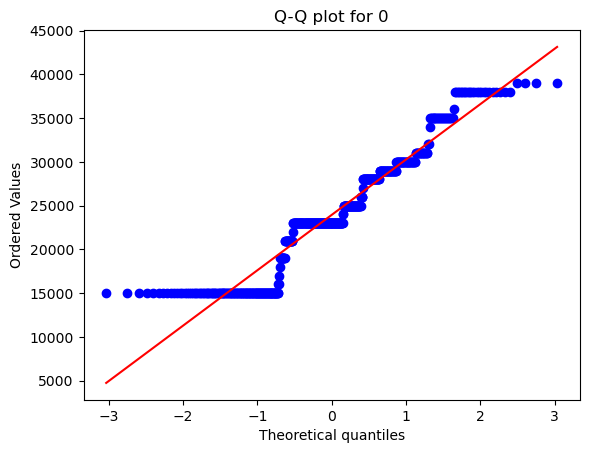

Shapiro-Wilk test for 0: W=0.9206765294075012, p-value=8.945638040427814e-17


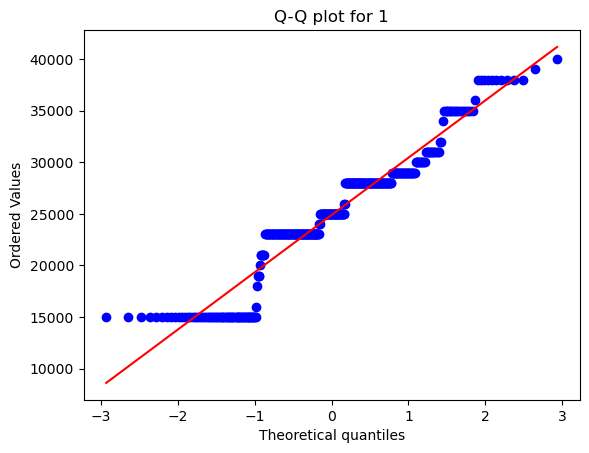

Shapiro-Wilk test for 1: W=0.9228849411010742, p-value=9.5317796624389e-14


In [194]:
# Check for normality using Q-Q plot and Shapiro-Wilk test
for i in df['Diabetes'].unique():
    country_data = df[df['Diabetes'] == i]['PremiumPrice']
    stats.probplot(country_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {i}')
    plt.show()
    shapiro_test = stats.shapiro(country_data)
    print(f'Shapiro-Wilk test for {i}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

In [195]:
# we can see that the the data does not follows the normality assumption, hence we'll use the KS test for this hypothesis

In [196]:
group0 = df[df['Diabetes'] == 0]['PremiumPrice']
group1 = df[df['Diabetes'] == 1]['PremiumPrice']
# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(group0, group1)
print(f"KS statistic: {ks_stat}")
print(f"p-value: {ks_p_value}")

# Decision based on the p-value
alpha = 0.05  # Common significance level
if ks_p_value < alpha:
    print("Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without diabetes.")
else:
    print("Fail to reject the null hypothesis (H0). The distributions of Premium Price are not significantly different for individuals with and without diabetes.")

KS statistic: 0.12465795074490726
p-value: 0.0010177491350519927
Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without diabetes.


Hypothesis 3

Null Hypothesis (H0): There is no significant difference in the mean premium price between individuals with blood pressure problems and those without blood pressure problems.
Alternative Hypothesis (H1): There is a significant difference in the mean premium price between individuals with blood pressure problems and those without blood pressure problems.

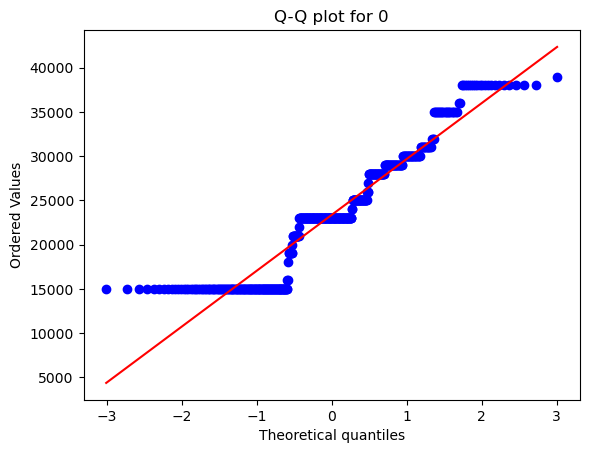

Shapiro-Wilk test for 0: W=0.9058817625045776, p-value=1.8076604573609153e-17


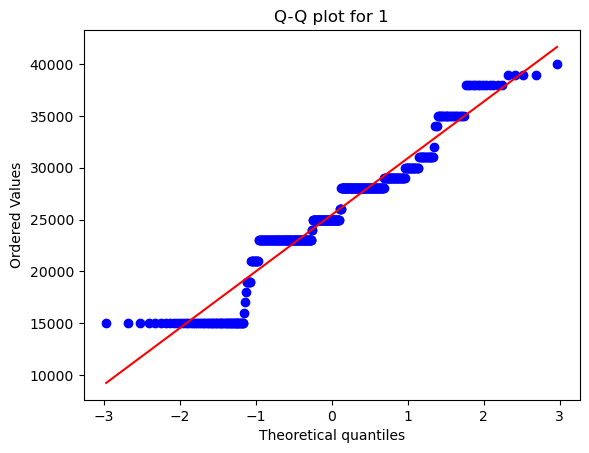

Shapiro-Wilk test for 1: W=0.9351159334182739, p-value=2.706844622578364e-13


In [197]:
# Check for normality using Q-Q plot and Shapiro-Wilk test
for i in df['BloodPressureProblems'].unique():
    country_data = df[df['BloodPressureProblems'] == i]['PremiumPrice']
    stats.probplot(country_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {i}')
    plt.show()
    shapiro_test = stats.shapiro(country_data)
    print(f'Shapiro-Wilk test for {i}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

In [198]:
group0 = df[df['BloodPressureProblems'] == 0]['PremiumPrice']
group1 = df[df['BloodPressureProblems'] == 1]['PremiumPrice']
# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(group0, group1)
print(f"KS statistic: {ks_stat}")
print(f"p-value: {ks_p_value}")

# Decision based on the p-value
alpha = 0.05  # Common significance level
if ks_p_value < alpha:
    print("Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without BloodPressure.")
else:
    print("Fail to reject the null hypothesis (H0). The distributions of Premium Price are not significantly different for individuals with and without BloodPressure.")

KS statistic: 0.20885793595717259
p-value: 7.217467665124132e-10
Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without BloodPressure.


Hypothesis 4

Null Hypothesis (H0): There is no significant difference in the mean premium price between individuals with transplants and those without transplants.
Alternative Hypothesis (H1): There is a significant difference in the mean premium price between individuals with transplants and those without transplants.

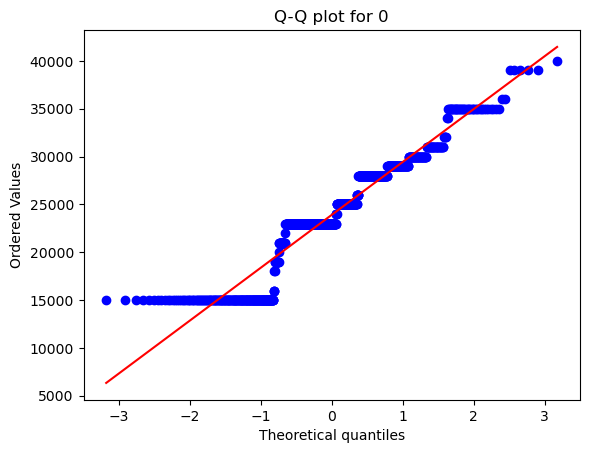

Shapiro-Wilk test for 0: W=0.920425534248352, p-value=9.72864465790466e-22


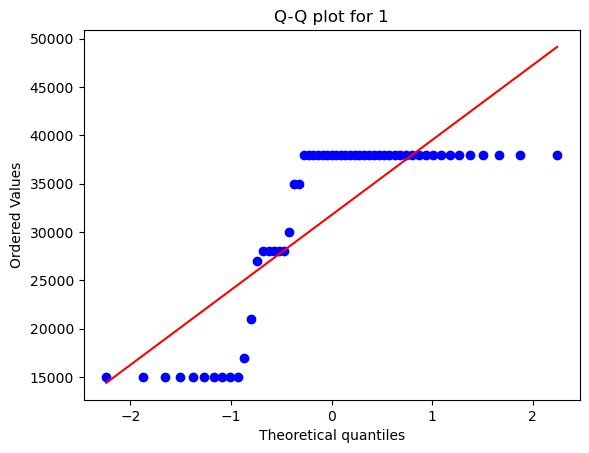

Shapiro-Wilk test for 1: W=0.6632013320922852, p-value=5.783741818810029e-10


In [199]:
# Check for normality using Q-Q plot and Shapiro-Wilk test
for i in df['AnyTransplants'].unique():
    country_data = df[df['AnyTransplants'] == i]['PremiumPrice']
    stats.probplot(country_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {i}')
    plt.show()
    shapiro_test = stats.shapiro(country_data)
    print(f'Shapiro-Wilk test for {i}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

In [200]:
group0 = df[df['AnyTransplants'] == 0]['PremiumPrice']
group1 = df[df['AnyTransplants'] == 1]['PremiumPrice']
# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(group0, group1)
print(f"KS statistic: {ks_stat}")
print(f"p-value: {ks_p_value}")

# Decision based on the p-value
alpha = 0.05  # Common significance level
if ks_p_value < alpha:
    print("Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without Any Transplant.")
else:
    print("Fail to reject the null hypothesis (H0). The distributions of Premium Price are not significantly different for individuals with and without Any Transplant.")

KS statistic: 0.6117371350454057
p-value: 4.2359786660954255e-19
Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without Any Transplant.


Hypothesis 5

Null Hypothesis (H0): There is no significant difference in the mean premium price between individuals with chronic diseases and those without chronic diseases.
Alternative Hypothesis (H1): There is a significant difference in the mean premium price between individuals with chronic diseases and those without chronic diseases.

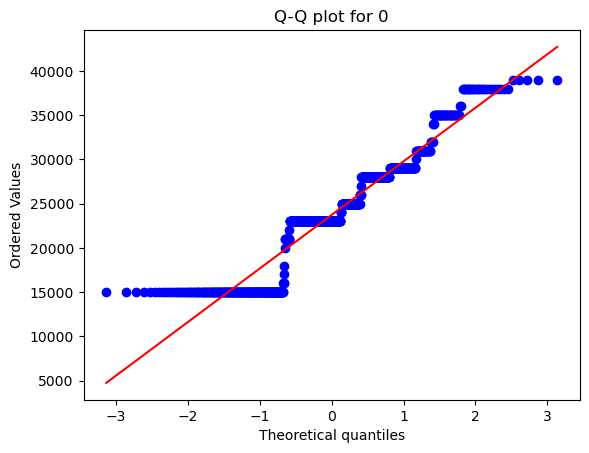

Shapiro-Wilk test for 0: W=0.9095441102981567, p-value=1.6922128160660258e-21


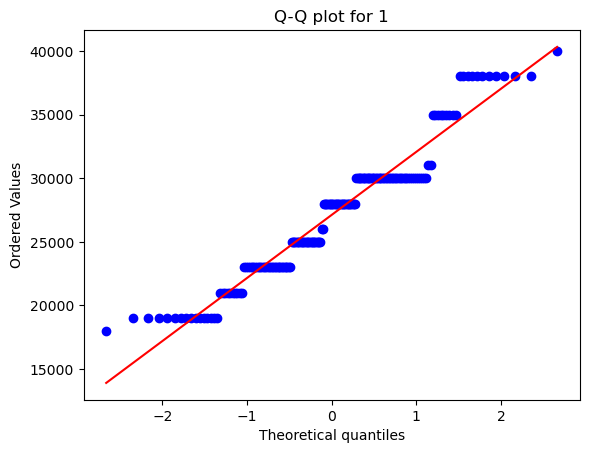

Shapiro-Wilk test for 1: W=0.9402453899383545, p-value=9.101813134293479e-07


In [201]:
# Check for normality using Q-Q plot and Shapiro-Wilk test
for i in df['AnyChronicDiseases'].unique():
    country_data = df[df['AnyChronicDiseases'] == i]['PremiumPrice']
    stats.probplot(country_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {i}')
    plt.show()
    shapiro_test = stats.shapiro(country_data)
    print(f'Shapiro-Wilk test for {i}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

In [202]:
group0 = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']
group1 = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']
# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(group0, group1)
print(f"KS statistic: {ks_stat}")
print(f"p-value: {ks_p_value}")

# Decision based on the p-value
alpha = 0.05  # Common significance level
if ks_p_value < alpha:
    print("Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without chronic diseases.")
else:
    print("Fail to reject the null hypothesis (H0). The distributions of Premium Price are not significantly different for individuals with and without chronic diseases.")

KS statistic: 0.26635332072533097
p-value: 1.2921586595775231e-09
Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without chronic diseases.


In [203]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


Hypothesis 6

Null Hypothesis (H0): There is no significant difference in the mean premium price between individuals with known allergies and those without known allergies.
Alternative Hypothesis (H1): There is a significant difference in the mean premium price between individuals with known allergies and those without known allergies.

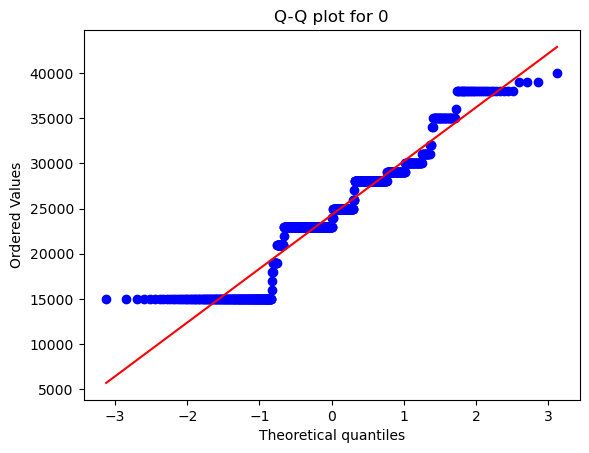

Shapiro-Wilk test for 0: W=0.925039529800415, p-value=3.438459008448576e-19


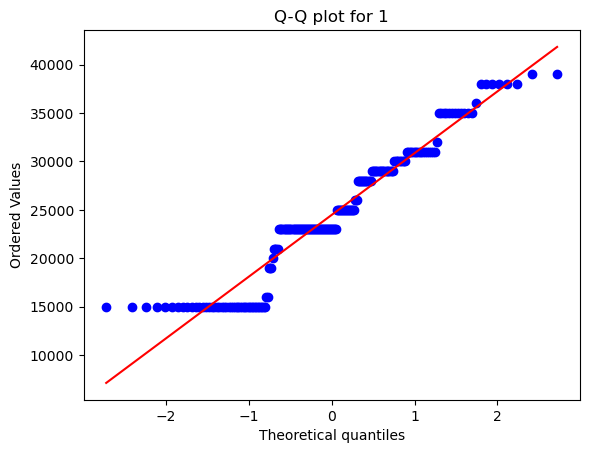

Shapiro-Wilk test for 1: W=0.9269988536834717, p-value=9.135792566894452e-09


In [204]:
# Check for normality using Q-Q plot and Shapiro-Wilk test
for i in df['KnownAllergies'].unique():
    country_data = df[df['KnownAllergies'] == i]['PremiumPrice']
    stats.probplot(country_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {i}')
    plt.show()
    shapiro_test = stats.shapiro(country_data)
    print(f'Shapiro-Wilk test for {i}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

In [205]:
group0 = df[df['KnownAllergies'] == 0]['PremiumPrice']
group1 = df[df['KnownAllergies'] == 1]['PremiumPrice']

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(group0, group1)
print(f"KS statistic: {ks_stat}")
print(f"p-value: {ks_p_value}")

# Decision based on the p-value
alpha = 0.05  # Common significance level
if ks_p_value < alpha:
    print("Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without known allergies.")
else:
    print("Fail to reject the null hypothesis (H0). The distributions of Premium Price are not significantly different for individuals with and without known allergies.")

KS statistic: 0.09381551362683438
p-value: 0.09915567896094857
Fail to reject the null hypothesis (H0). The distributions of Premium Price are not significantly different for individuals with and without known allergies.


Hypothesis 7

Null Hypothesis (H0): There is no significant difference in the mean premium price between individuals with a history of cancer in the family and those without.
Alternative Hypothesis (H1): There is a significant difference in the mean premium price between individuals with a history of cancer in the family and those without.

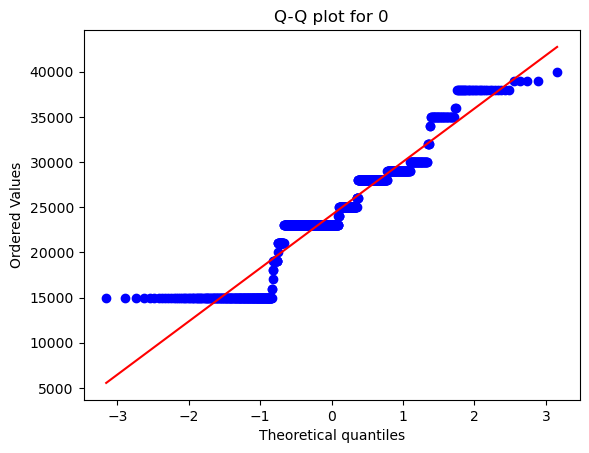

Shapiro-Wilk test for 0: W=0.9209518432617188, p-value=6.2114228120764276e-21


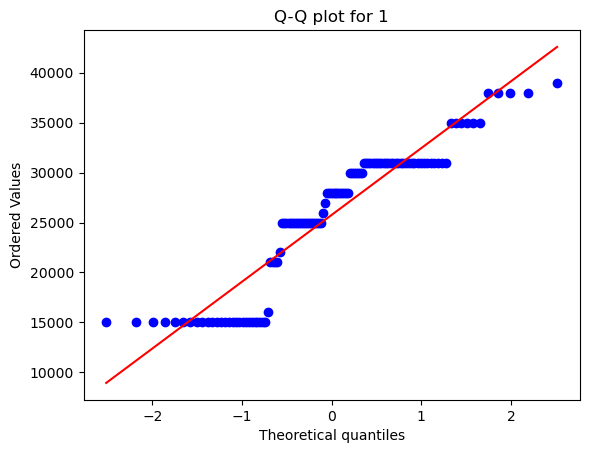

Shapiro-Wilk test for 1: W=0.8760472536087036, p-value=2.1321495680126645e-08


In [206]:
# Check for normality using Q-Q plot and Shapiro-Wilk test
for i in df['HistoryOfCancerInFamily'].unique():
    country_data = df[df['HistoryOfCancerInFamily'] == i]['PremiumPrice']
    stats.probplot(country_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {i}')
    plt.show()
    shapiro_test = stats.shapiro(country_data)
    print(f'Shapiro-Wilk test for {i}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

In [207]:
group0 = df[df['HistoryOfCancerInFamily'] == 0]['PremiumPrice']
group1 = df[df['HistoryOfCancerInFamily'] == 1]['PremiumPrice']

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(group0, group1)
print(f"KS statistic: {ks_stat}")
print(f"p-value: {ks_p_value}")

# Decision based on the p-value
alpha = 0.05  # Common significance level
if ks_p_value < alpha:
    print("Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without a history of cancer in the family.")
else:
    print("Fail to reject the null hypothesis (H0). The distributions of Premium Price are not significantly different for individuals with and without a history of cancer in the family.")

KS statistic: 0.2867816091954023
p-value: 6.349478633106491e-08
Reject the null hypothesis (H0). The distributions of Premium Price are different for individuals with and without a history of cancer in the family.


In [208]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


Hypothesis 8

Null Hypothesis (H0): There is no significant difference in the mean premium price between individuals based on the number of major surgeries they have had.
Alternative Hypothesis (H1): There is a significant difference in the mean premium price between individuals based on the number of major surgeries they have had.

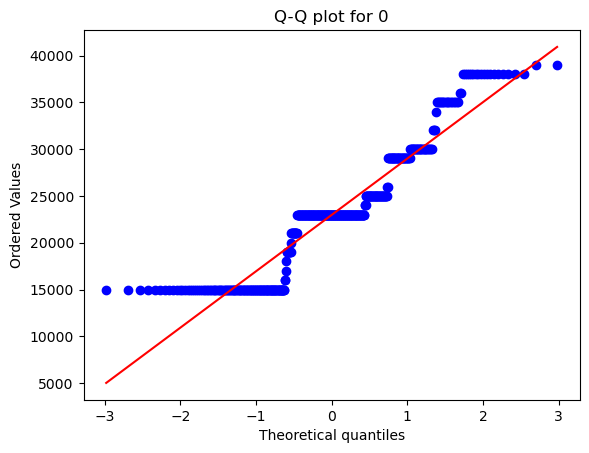

Shapiro-Wilk test for 0: W=0.8885378837585449, p-value=3.900849351950539e-18


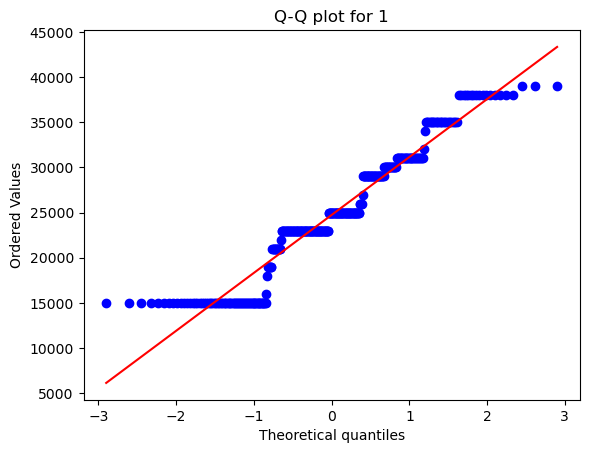

Shapiro-Wilk test for 1: W=0.9308931827545166, p-value=4.195002852036556e-12


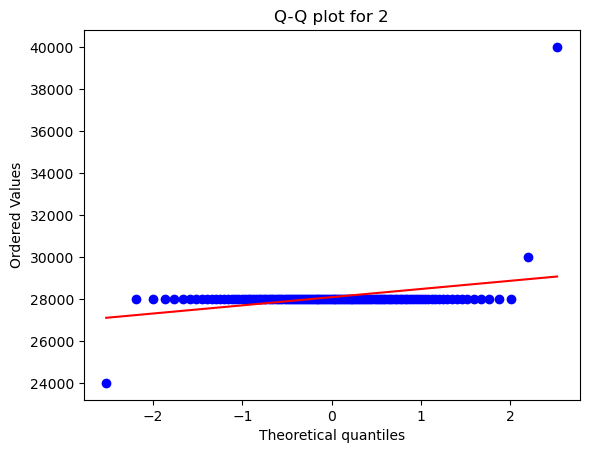

Shapiro-Wilk test for 2: W=0.12415271997451782, p-value=1.809075307965078e-23


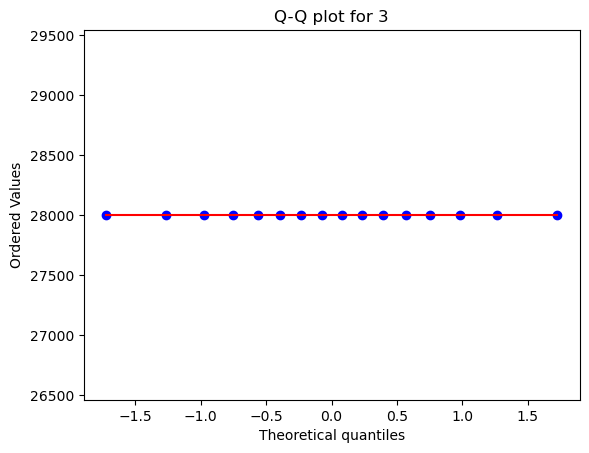

Shapiro-Wilk test for 3: W=1.0, p-value=1.0


C:\Users\HAtrish\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [209]:
# Check for normality using Q-Q plot and Shapiro-Wilk test
for i in df['NumberOfMajorSurgeries'].unique():
    country_data = df[df['NumberOfMajorSurgeries'] == i]['PremiumPrice']
    stats.probplot(country_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {i}')
    plt.show()
    shapiro_test = stats.shapiro(country_data)
    print(f'Shapiro-Wilk test for {i}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

In [210]:
groups = df['NumberOfMajorSurgeries'].unique()
ks_results = {}

for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group_i = df[df['NumberOfMajorSurgeries'] == groups[i]]['PremiumPrice']
        group_j = df[df['NumberOfMajorSurgeries'] == groups[j]]['PremiumPrice']
        ks_stat, ks_p_value = ks_2samp(group_i, group_j)
        ks_results[(groups[i], groups[j])] = (ks_stat, ks_p_value)

# Print the KS test results
for groups_pair, (ks_stat, ks_p_value) in ks_results.items():
    print(f"KS statistic for {groups_pair}: {ks_stat}")
    print(f"p-value for {groups_pair}: {ks_p_value}")

    # Decision based on the p-value
    alpha = 0.05  # Common significance level
    if ks_p_value < alpha:
        print(f"Reject the null hypothesis (H0) for groups {groups_pair}. The distributions of Premium Price are different for these groups.")
    else:
        print(f"Fail to reject the null hypothesis (H0) for groups {groups_pair}. The distributions of Premium Price are not significantly different for these groups.")

KS statistic for (0, 1): 0.19045053538958853
p-value for (0, 1): 3.975885823112823e-07
Reject the null hypothesis (H0) for groups (0, 1). The distributions of Premium Price are different for these groups.
KS statistic for (0, 2): 0.7640392273819757
p-value for (0, 2): 1.7050094408873255e-56
Reject the null hypothesis (H0) for groups (0, 2). The distributions of Premium Price are different for these groups.
KS statistic for (0, 3): 0.7724425887265136
p-value for (0, 3): 4.102491386920854e-10
Reject the null hypothesis (H0) for groups (0, 3). The distributions of Premium Price are different for these groups.
KS statistic for (1, 2): 0.6475106171500858
p-value for (1, 2): 1.586610474145929e-36
Reject the null hypothesis (H0) for groups (1, 2). The distributions of Premium Price are different for these groups.
KS statistic for (1, 3): 0.6559139784946236
p-value for (1, 3): 5.827768464361586e-07
Reject the null hypothesis (H0) for groups (1, 3). The distributions of Premium Price are differ

Hypothesis 9

Null Hypothesis (H0): There is no significant relationship between 'Height' and 'PremiumPrice'.
Alternative Hypothesis (H1): There is a significant relationship between 'Height' and 'PremiumPrice'.

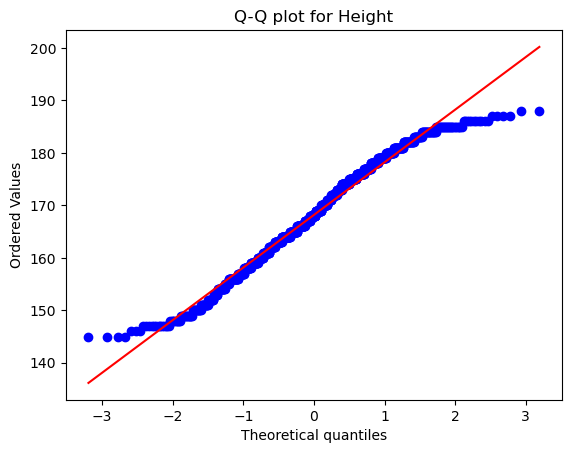

In [211]:
# Q-Q plot for Height
stats.probplot(df['Height'], dist="norm", plot=plt)
plt.title('Q-Q plot for Height')
plt.show()

In [212]:
# Shapiro-Wilk test for normality
shapiro_test_height = shapiro(df['Height'])
shapiro_test_premium = shapiro(df['PremiumPrice'])
print(f"Shapiro-Wilk test for Height: Statistic={shapiro_test_height.statistic}, p-value={shapiro_test_height.pvalue}")
print(f"Shapiro-Wilk test for Premium Price: Statistic={shapiro_test_premium.statistic}, p-value={shapiro_test_premium.pvalue}")

# Interpretation
alpha = 0.05  # Common significance level

if shapiro_test_height.pvalue > alpha:
    print("Fail to reject the null hypothesis for Height. The data is normally distributed.")
else:
    print("Reject the null hypothesis for Height. The data is not normally distributed.")

if shapiro_test_premium.pvalue > alpha:
    print("Fail to reject the null hypothesis for Premium Price. The data is normally distributed.")
else:
    print("Reject the null hypothesis for Premium Price. The data is not normally distributed.")


Shapiro-Wilk test for Height: Statistic=0.9800278544425964, p-value=2.2109317154850316e-10
Shapiro-Wilk test for Premium Price: Statistic=0.9272118210792542, p-value=1.8807914164760764e-21
Reject the null hypothesis for Height. The data is not normally distributed.
Reject the null hypothesis for Premium Price. The data is not normally distributed.


In [213]:
# Calculate the Pearson correlation coefficient and p-value
pearson_corr, pearson_p_value = pearsonr(df['Height'], df['PremiumPrice'])
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Pearson p-value: {pearson_p_value}")

# Calculate the Spearman correlation coefficient and p-value
spearman_corr, spearman_p_value = spearmanr(df['Height'], df['PremiumPrice'])
print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"Spearman p-value: {spearman_p_value}")

# Calculate the Kendall correlation coefficient and p-value
kendall_corr, kendall_p_value = kendalltau(df['Height'], df['PremiumPrice'])
print(f"Kendall correlation coefficient: {kendall_corr}")
print(f"Kendall p-value: {kendall_p_value}")

# Decision based on the p-value
alpha = 0.05  # Common significance level
print("\nDecisions:")
if pearson_p_value < alpha:
    print("Pearson: Reject the null hypothesis (H0). Significant relationship.")
else:
    print("Pearson: Fail to reject the null hypothesis (H0). No significant relationship.")

if spearman_p_value < alpha:
    print("Spearman: Reject the null hypothesis (H0). Significant relationship.")
else:
    print("Spearman: Fail to reject the null hypothesis (H0). No significant relationship.")

if kendall_p_value < alpha:
    print("Kendall: Reject the null hypothesis (H0). Significant relationship.")
else:
    print("Kendall: Fail to reject the null hypothesis (H0). No significant relationship.")

Pearson correlation coefficient: 0.026909513982139963
Pearson p-value: 0.3986376207316457
Spearman correlation coefficient: 0.023127968621618453
Spearman p-value: 0.4682013025491134
Kendall correlation coefficient: 0.016235390842969263
Kendall p-value: 0.47992628427639117

Decisions:
Pearson: Fail to reject the null hypothesis (H0). No significant relationship.
Spearman: Fail to reject the null hypothesis (H0). No significant relationship.
Kendall: Fail to reject the null hypothesis (H0). No significant relationship.


Hypothesis 10

Null Hypothesis (H0): There is no significant relationship between 'Weight' and 'PremiumPrice'.
Alternative Hypothesis (H1): There is a significant relationship between 'Weight' and 'PremiumPrice'.

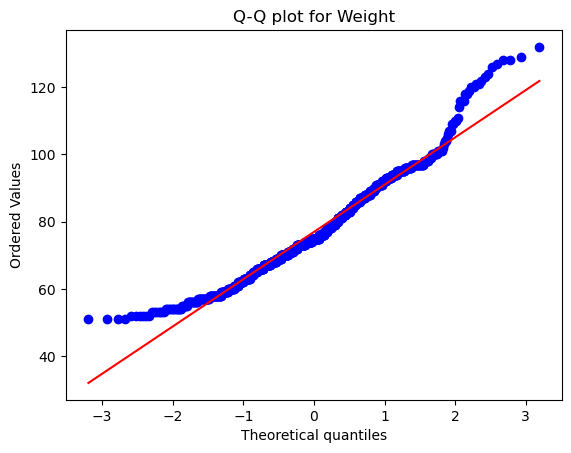

In [214]:
# Q-Q plot for Weight
stats.probplot(df['Weight'], dist="norm", plot=plt)
plt.title('Q-Q plot for Weight')
plt.show()

In [215]:
# Shapiro-Wilk test for normality
shapiro_test_weight = shapiro(df['Weight'])
shapiro_test_premium = shapiro(df['PremiumPrice'])
print(f"Shapiro-Wilk test for Weight: Statistic={shapiro_test_weight.statistic}, p-value={shapiro_test_weight.pvalue}")
print(f"Shapiro-Wilk test for Premium Price: Statistic={shapiro_test_premium.statistic}, p-value={shapiro_test_premium.pvalue}")

# Interpretation
alpha = 0.05  # Common significance level

if shapiro_test_weight.pvalue > alpha:
    print("Fail to reject the null hypothesis for Weight. The data is normally distributed.")
else:
    print("Reject the null hypothesis for Weight. The data is not normally distributed.")

if shapiro_test_premium.pvalue > alpha:
    print("Fail to reject the null hypothesis for Premium Price. The data is normally distributed.")
else:
    print("Reject the null hypothesis for Premium Price. The data is not normally distributed.")


Shapiro-Wilk test for Weight: Statistic=0.9670331478118896, p-value=3.752058139552296e-14
Shapiro-Wilk test for Premium Price: Statistic=0.9272118210792542, p-value=1.8807914164760764e-21
Reject the null hypothesis for Weight. The data is not normally distributed.
Reject the null hypothesis for Premium Price. The data is not normally distributed.


In [216]:
# Calculate the Pearson correlation coefficient and p-value
pearson_corr, pearson_p_value = pearsonr(df['Weight'], df['PremiumPrice'])
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Pearson p-value: {pearson_p_value}")

# Calculate the Spearman correlation coefficient and p-value
spearman_corr, spearman_p_value = spearmanr(df['Weight'], df['PremiumPrice'])
print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"Spearman p-value: {spearman_p_value}")

# Calculate the Kendall correlation coefficient and p-value
kendall_corr, kendall_p_value = kendalltau(df['Weight'], df['PremiumPrice'])
print(f"Kendall correlation coefficient: {kendall_corr}")
print(f"Kendall p-value: {kendall_p_value}")

# Decision based on the p-value
alpha = 0.05  # Common significance level
print("\nDecisions:")
if pearson_p_value < alpha:
    print("Pearson: Reject the null hypothesis (H0). Significant relationship.")
else:
    print("Pearson: Fail to reject the null hypothesis (H0). No significant relationship.")

if spearman_p_value < alpha:
    print("Spearman: Reject the null hypothesis (H0). Significant relationship.")
else:
    print("Spearman: Fail to reject the null hypothesis (H0). No significant relationship.")

if kendall_p_value < alpha:
    print("Kendall: Reject the null hypothesis (H0). Significant relationship.")
else:
    print("Kendall: Fail to reject the null hypothesis (H0). No significant relationship.")

Pearson correlation coefficient: 0.14150740525639743
Pearson p-value: 8.186473650456371e-06
Spearman correlation coefficient: 0.12932369149208855
Spearman p-value: 4.6449422791062667e-05
Kendall correlation coefficient: 0.09447992652862422
Kendall p-value: 3.760729580486612e-05

Decisions:
Pearson: Reject the null hypothesis (H0). Significant relationship.
Spearman: Reject the null hypothesis (H0). Significant relationship.
Kendall: Reject the null hypothesis (H0). Significant relationship.


ML Modeling

In [217]:
#let's split the data into X, and y variable
X = df.drop('PremiumPrice',axis=1)
y = df['PremiumPrice']

In [218]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb

In [219]:
# Data normalization
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the features and target variable
scaled_X = scaler_X.fit_transform(X)
scaled_y = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [220]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'model__fit_intercept': [True, False]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0, 100.0],
            'model__fit_intercept': [True, False]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0, 100.0],
            'model__fit_intercept': [True, False]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'model__max_depth': [None, 5, 10, 15, 20],
            'model__min_samples_split': [2, 5, 10, 15],
            'model__min_samples_leaf': [1, 2, 4, 6],
            'model__max_features': [None, 'auto', 'sqrt', 'log2']
        }
    },
    'Bagging': {
        'model': BaggingRegressor(),
        'params': {
            'model__n_estimators': [10, 20, 50, 100],
            'model__max_samples': [0.5, 0.7, 1.0],
            'model__max_features': [0.5, 0.7, 1.0],
            'model__bootstrap': [True, False]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
            'model__max_depth': [3, 5, 7, 9],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__subsample': [0.8, 1.0]
        }
    },
    'XGBoost': {
        'model': xgb.XGBRegressor(),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7],
            'model__subsample': [0.8, 1.0],
            'model__colsample_bytree': [0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMRegressor(),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__num_leaves': [31, 63, 127],
            'model__max_depth': [-1, 10, 20],
            'model__subsample': [0.8, 1.0],
            'model__colsample_bytree': [0.8, 1.0]
        }
    }
}

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    
    return rmse, mse, mape, r2

# Perform Grid Search and evaluate each model
for name, model_info in models.items():
    print(f"\n{name}:")
    
    model = model_info['model']
    params = model_info['params']
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    grid_search = GridSearchCV(pipeline, params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    print("Best parameters:", grid_search.best_params_)
    
    # Evaluate the best model
    rmse, mse, mape, r2 = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    print(f"RMSE: {rmse:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R2 Score: {r2:.2f}")


Linear Regression:
Best parameters: {'model__fit_intercept': True}
RMSE: 3495.95
MSE: 12221661.71
MAPE: 10.96%
R2 Score: 0.71

Ridge:
Best parameters: {'model__alpha': 1.0, 'model__fit_intercept': True}
RMSE: 3496.89
MSE: 12228233.09
MAPE: 10.97%
R2 Score: 0.71

Lasso:
Best parameters: {'model__alpha': 10.0, 'model__fit_intercept': True}
RMSE: 3500.84
MSE: 12255895.58
MAPE: 10.99%
R2 Score: 0.71

Decision Tree:


C:\Users\HAtrish\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\HAtrish\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Best parameters: {'model__criterion': 'friedman_mse', 'model__max_depth': 20, 'model__max_features': 'auto', 'model__min_samples_leaf': 2, 'model__min_samples_split': 10}
RMSE: 2350.31
MSE: 5523966.62
MAPE: 3.32%
R2 Score: 0.87

Bagging:
Best parameters: {'model__bootstrap': True, 'model__max_features': 1.0, 'model__max_samples': 0.5, 'model__n_estimators': 50}
RMSE: 2115.30
MSE: 4474478.79
MAPE: 4.82%
R2 Score: 0.90

Gradient Boosting:
Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 100, 'model__subsample': 0.8}
RMSE: 2180.60
MSE: 4755036.63
MAPE: 5.28%
R2 Score: 0.89

XGBoost:
Best parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 50, 'model__subsample': 1.0}
RMSE: 2443.56
MSE: 5970999.96
MAPE: 5.29%
R2 Score: 0.86

LightGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves 

Based on the performance metrics, the Decision Tree and LightGBM models both show strong results with the highest R2 scores and the lowest RMSE and MAPE. Given that the Decision Tree has a lower MAPE and offers simplicity and interpretability, I will choose it for its comparative advantages in prediction accuracy and ease of understanding.

Final Model

In [222]:
final_model = DecisionTreeRegressor(
        criterion='friedman_mse',   # Best criterion from GridSearchCV
        max_depth=20,               # Best max_depth
        max_features=None,          # Best max_features
        min_samples_leaf=2,         # Best min_samples_leaf
        min_samples_split=10        # Best min_samples_split
    )

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Final Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R2 Score: {r2:.2f}")

Final Model Evaluation:
RMSE: 2229.41
MSE: 4970258.43
MAPE: 3.27%
R2 Score: 0.88


In [224]:
# Save the trained model to a file
import joblib

joblib.dump(final_model, 'final_insurance_prediction_model.pkl')

['final_insurance_prediction_model.pkl']

In [223]:
# # Save the trained model to a file
# import pickle

# with open('final_insurance_prediction_model.pkl', 'wb') as file:
#     pickle.dump(final_model, file)